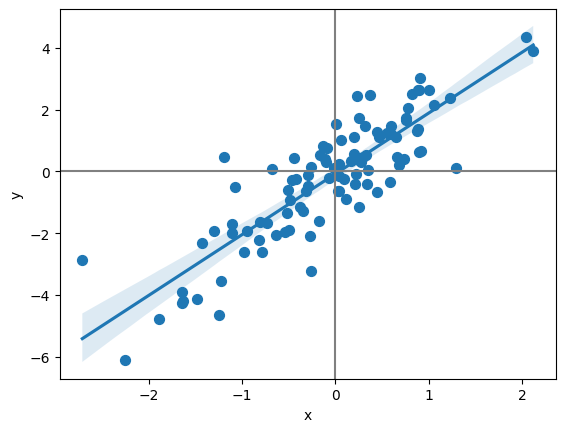

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(1)
rng = np.random.default_rng (1)
x = rng.normal(size =100)
y = 2 * x + rng.normal(size =100)
df = pd.DataFrame({'x': x, 'y': y})

fig, ax = plt.subplots()
sns.regplot(x='x', y='y', data=df, scatter_kws={"s": 50, "alpha": 1}, ax=ax)
ax.axhline(color='gray')
ax.axvline(color='gray')

In [2]:
import statsmodels.formula.api as smf
reg = smf.ols('y ~ x + 0', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Fri, 22 Nov 2024   Prob (F-statistic):                    6.23e-31
Time:                        15:19:39   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              1.9762      0.117     16.898      0.000       1.744       2.208
==============================================================================
Omnibus:                        1.376   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                0.847
Skew:                           0.121   Prob(JB):                        0.655
Kurtosis:                       3.381   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the table above, we see that the coefficient estimate $β^2=1.9762$ and the standard error of this coefficient estimate is 0.117. The t-statistic is equal to 16.898 and the p-value seem close to 0 (less than 0.0005). We can therefore reject the null hypothesis and conclude that there is evidence for a relationship between x and y.

In [3]:
reg = smf.ols('x ~ y + 0', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      x   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Fri, 22 Nov 2024   Prob (F-statistic):                    6.23e-31
Time:                        15:19:39   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y              0.3757      0.022     16.898      0.000       0.332       0.420
==============================================================================
Omnibus:                       13.156   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.596
Skew:                          -0.528   Prob(JB):                     1.24e-05
Kurtosis:                       5.075   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the table above, we see that the coefficient estimate $β^2=0.3757$ and the standard error of this coefficient estimate is 0.022. The t-statistic is equal to 16.898 and the p-value is close to 0 (less than 0.0005). We can therefore reject the null hypothesis and conclude that there is evidence for a relationship between x and y.

As we can see from the two tables above, the t-statistics are the same, which means that the p-values are the same (we will see later why). Perhaps surprisingly, the coefficient estimates are not the inverse of each other. That is, $\hat{\beta}_y \neq 1/\hat{\beta}_x$, where $\hat{\beta}_y$ and $\hat{\beta}_x$ are the coefficients of the models $Y=\hat{\beta}_xX$ and $X=\hat{\beta}_y Y$, respectively. We know $\hat{\beta}_x ≃2$, but $\hat{\beta}_y$ seems to be closer to 0.4 than 0.5. What is going on here?

The short answer: it has to do with the fitting method and with the non-symmetric loss function.

The coefficient estimates are the values that minimize the loss functions of ordinary least squares for these linear models without intercept, which leads to:

$
\hat{\beta}_x = \arg\min_\beta \sum (y_i - \beta x_i)^2 = \frac{\sum y_i x_i}{\sum x_i^2} 
= \left( \frac{\mathbb{E}[XY]}{\mathbb{E}[X^2]} = \frac{\mathbb{E}[XY] - \mathbb{E}[X]\mathbb{E}[Y]}{\mathbb{E}[(X - \mathbb{E}[X])^2]} = \frac{\text{cov}(X, Y)}{\text{var}(X)} \right),
$

$
\hat{\beta}_y = \arg\min_\beta \sum (x_i - \beta y_i)^2 = \frac{\sum y_i x_i}{\sum y_i^2} 
= \left( \frac{\mathbb{E}[XY]}{\mathbb{E}[Y^2]} = \frac{\mathbb{E}[XY] - \mathbb{E}[X]\mathbb{E}[Y]}{\mathbb{E}[(Y - \mathbb{E}[Y])^2]} = \frac{\text{cov}(X, Y)}{\text{var}(Y)} \right),
$

Since $ \mathbb{E}[X] = \mathbb{E}[Y] = 0$

We know that the $ \text{var}(X) = 1$, so that $\text{var}(Y) = \text{var}(2X + \epsilon) = 4 \, \text{var}(X) + \text{var}(\epsilon) = 4(1) + 1 = 5$

Since : $\sum y_i x_i = \sum (2x_i + \epsilon_i)x_i = 2 \sum x_i^2 + \sum x_i \epsilon_i \sim 2 \sum x_i^2$

So $\hat{\beta}_x \sim 2/1 = 2$  and $\hat{\beta}_y \sim 2/5 = 0.4$